In [ ]:
import csv

def load_dataset(filename):
    with open(filename, 'r') as file:
        csv_reader = csv.DictReader(file)
        data = [row for row in csv_reader]
    return data

In [ ]:
def extract_column(data, column_name):
    return [row[column_name] for row in data]

In [ ]:
def frequency_distribution(data, bins=101):
    min_val = min(data)
    max_val = max(data)
    range_val = max_val - min_val
    bin_width = range_val / bins
    distribution = [0] * bins
    for value in data:
        index = int((value - min_val) / bin_width)
        if index == bins:  # Edge case for the maximum value
            index -= 1
        distribution[index] += 1
    return distribution

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(data, bins=15, title="Histogram", xlabel="Value", ylabel="Frequency"):
    plt.hist(data, bins=bins, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [ ]:
def calculate_mean(data):
    return sum(data) / len(data)

def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return sorted_data[mid]

def calculate_mode(data):
    frequency = {}
    for value in data:
        frequency[value] = frequency.get(value, 0) + 1
    max_frequency = max(frequency.values())
    modes = [key for key, val in frequency.items() if val == max_frequency]
    return modes[0] if len(modes) == 1 else modes

def calculate_std_dev(data):
    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return variance ** 0.5

In [ ]:
def categorize_data(data, category_column, numerical_column, specified_category):
    categorized_data = [float(row[numerical_column]) for row in data if row[category_column] == specified_category]
    return categorized_data

In [ ]:
def calculate_percentile(data, percentile):
    size = len(data)
    sorted_data = sorted(data)
    index = int(size * percentile)
    return sorted_data[index]

In [ ]:
filename = 'exams.csv'  # Ensure this is the correct path to your CSV file.
data = load_dataset(filename)

In [ ]:
math_scores = extract_column(data, 'math score')
reading_scores = extract_column(data, 'reading score')
writing_scores = extract_column(data, 'writing score')

# Convert scores from strings to integers
math_scores = list(map(int, math_scores))
reading_scores = list(map(int, reading_scores))
writing_scores = list(map(int, writing_scores))

Math Scores Analysis:
Mean: 66.396
Median: 66.5
Mode: 63
Standard Deviation: 15.395167553488974
50th Percentile: 67
90th Percentile: 86


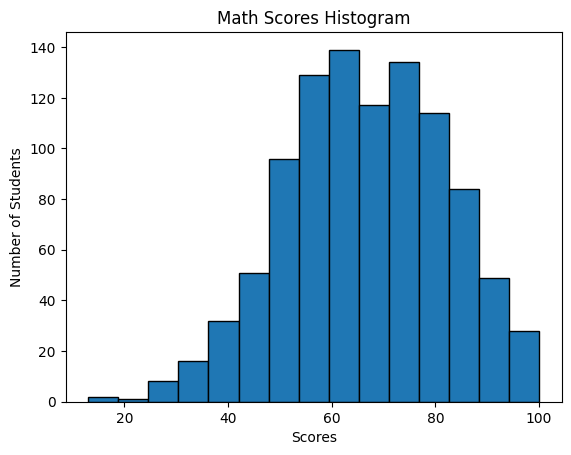

In [ ]:
# Calculate statistics for math scores
print("Math Scores Analysis:")
print(f"Mean: {calculate_mean(math_scores)}")
print(f"Median: {calculate_median(math_scores)}")
print(f"Mode: {calculate_mode(math_scores)}")
print(f"Standard Deviation: {calculate_std_dev(math_scores)}")

# Calculate and display the 50th and 90th percentiles
print(f"50th Percentile: {calculate_percentile(math_scores, 0.5)}")
print(f"90th Percentile: {calculate_percentile(math_scores, 0.9)}")

# Plot histogram
plot_histogram(math_scores, bins=15, title="Math Scores Histogram", xlabel="Scores", ylabel="Number of Students")

Reading Scores Analysis:
Mean: 69.002
Median: 70.0
Mode: 71
Standard Deviation: 14.729901425332077
50th Percentile: 70
90th Percentile: 88


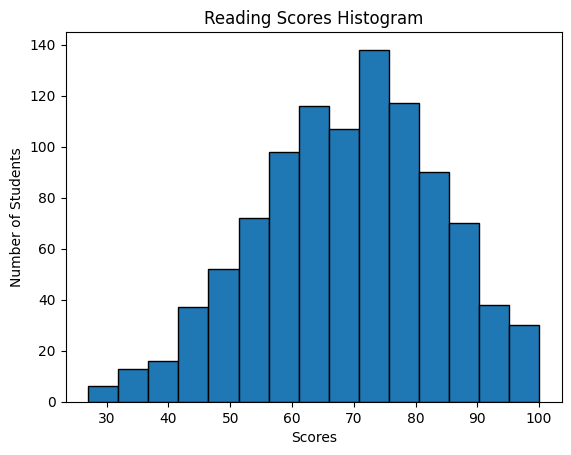

In [ ]:
# Calculate statistics for reading scores
print("Reading Scores Analysis:")
print(f"Mean: {calculate_mean(reading_scores)}")
print(f"Median: {calculate_median(reading_scores)}")
print(f"Mode: {calculate_mode(reading_scores)}")
print(f"Standard Deviation: {calculate_std_dev(reading_scores)}")

# Calculate and display the 50th and 90th percentiles
print(f"50th Percentile: {calculate_percentile(reading_scores, 0.5)}")
print(f"90th Percentile: {calculate_percentile(reading_scores, 0.9)}")

# Plot histogram
plot_histogram(reading_scores, bins=15, title="Reading Scores Histogram", xlabel="Scores", ylabel="Number of Students")

Writing Scores Analysis:
Mean: 67.738
Median: 68.0
Mode: [71, 64]
Standard Deviation: 15.593182997707693
50th Percentile: 68
90th Percentile: 88


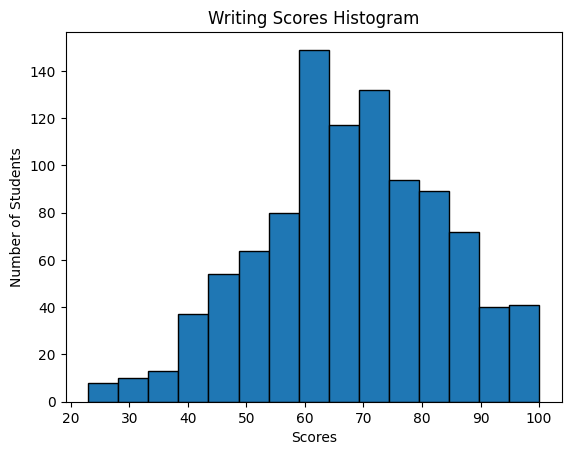

In [ ]:
# Calculate statistics for writing scores
print("Writing Scores Analysis:")
print(f"Mean: {calculate_mean(writing_scores)}")
print(f"Median: {calculate_median(writing_scores)}")
print(f"Mode: {calculate_mode(writing_scores)}")
print(f"Standard Deviation: {calculate_std_dev(writing_scores)}")

# Calculate and display the 50th and 90th percentiles
print(f"50th Percentile: {calculate_percentile(writing_scores, 0.5)}")
print(f"90th Percentile: {calculate_percentile(writing_scores, 0.9)}")

# Plot histogram
plot_histogram(writing_scores, bins=15, title="Writing Scores Histogram", xlabel="Scores", ylabel="Number of Students")

In [ ]:
# Example for math scores by test preparation course
test_prep = extract_column(data, 'test preparation course')
unique_prep = set(test_prep)

for prep in unique_prep:
    prep_scores = [math_scores[i] for i in range(len(math_scores)) if test_prep[i] == prep]
    print(f"Math Scores for test preparation {prep}: Mean = {calculate_mean(prep_scores)}")


Math Scores for test preparation completed: Mean = 69.68656716417911
Math Scores for test preparation none: Mean = 64.73834586466165


In [ ]:
# Similar to the test preparation analysis, but filter by parental education levels.
parental_education = extract_column(data, 'parental level of education')
unique_education_levels = set(parental_education)

for level in unique_education_levels:
    level_scores = [math_scores[i] for i in range(len(math_scores)) if parental_education[i] == level]
    print(f"Math Scores for parental education level {level}: Mean = {calculate_mean(level_scores)}")


Math Scores for parental education level some college: Mean = 65.29729729729729
Math Scores for parental education level high school: Mean = 65.20792079207921
Math Scores for parental education level associate's degree: Mean = 69.53694581280789
Math Scores for parental education level bachelor's degree: Mean = 71.49107142857143
Math Scores for parental education level some high school: Mean = 60.70157068062827
Math Scores for parental education level master's degree: Mean = 71.58571428571429


In [ ]:
from tabulate import tabulate

def calculate_average_scores_by_category(scores, categories):
    category_averages = {}
    for category in set(categories):
        category_scores = [scores[i] for i, cat in enumerate(categories) if cat == category]
        average_score = sum(category_scores) / len(category_scores)
        category_averages[category] = average_score
    return category_averages




In [ ]:
# Calculate average scores by test preparation for math, reading, and writing
test_prep = extract_column(data, 'test preparation course')

math_averages_prep = calculate_average_scores_by_category(math_scores, test_prep)
reading_averages_prep = calculate_average_scores_by_category(reading_scores, test_prep)
writing_averages_prep = calculate_average_scores_by_category(writing_scores, test_prep)

# Prepare data for table
table_data_prep = [["Test Preparation", "Math Average", "Reading Average", "Writing Average"]]
for prep in math_averages_prep:
    table_data_prep.append([prep, math_averages_prep[prep], reading_averages_prep[prep], writing_averages_prep[prep]])

# Display table
print("Average Scores by Test Preparation")
print(tabulate(table_data_prep, headers="firstrow", tablefmt="grid"))


Average Scores by Test Preparation
+--------------------+----------------+-------------------+-------------------+
| Test Preparation   |   Math Average |   Reading Average |   Writing Average |
+====================+================+===================+===================+
| completed          |        69.6866 |           74.0896 |           74.6716 |
+--------------------+----------------+-------------------+-------------------+
| none               |        64.7383 |           66.4391 |           64.2451 |
+--------------------+----------------+-------------------+-------------------+


In [ ]:
# Calculate average scores by parental education levels for math, reading, and writing
parental_education = extract_column(data, 'parental level of education')

math_averages_education = calculate_average_scores_by_category(math_scores, parental_education)
reading_averages_education = calculate_average_scores_by_category(reading_scores, parental_education)
writing_averages_education = calculate_average_scores_by_category(writing_scores, parental_education)

# Prepare data for table
table_data_education = [["Parental Education", "Math Average", "Reading Average", "Writing Average"]]
for level in math_averages_education:
    table_data_education.append([level, math_averages_education[level], reading_averages_education[level], writing_averages_education[level]])

# Display table
print("Average Scores by Parental Education Levels")
print(tabulate(table_data_education, headers="firstrow", tablefmt="grid"))


Average Scores by Parental Education Levels
+----------------------+----------------+-------------------+-------------------+
| Parental Education   |   Math Average |   Reading Average |   Writing Average |
+======================+================+===================+===================+
| some college         |        65.2973 |           68.045  |           66.7342 |
+----------------------+----------------+-------------------+-------------------+
| high school          |        65.2079 |           67.401  |           64.8465 |
+----------------------+----------------+-------------------+-------------------+
| associate's degree   |        69.5369 |           70.9852 |           70.1133 |
+----------------------+----------------+-------------------+-------------------+
| bachelor's degree    |        71.4911 |           74.0089 |           74.4107 |
+----------------------+----------------+-------------------+-------------------+
| some high school     |        60.7016 |           64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6cd00808-406a-4129-ab29-05b4bbe2f656' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>